In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
df = pd.read_csv('../../data/clean_kc_house_data.csv')
df = df.drop(columns='Unnamed: 0')

In [61]:
x = df.drop(columns='price')
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 23)

In [58]:
sqftModel = sm.OLS(y_train,x_train['sqft_living']).fit()
sqftModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          8.203e+04
Date:                Mon, 27 Jun 2022   Prob (F-statistic):                        0.00
Time:                        16:58:19   Log-Likelihood:                     -2.1850e+05
No. Observations:               15727   AIC:                                  4.370e+05
Df Residuals:                   15726   BIC:                                  4.370e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   262.6802      0.917    286.411      0.000     260.883     264.478
==============================================================================
Omnibus:                    12412.885   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           688953.524
Skew:                           3.351   Prob(JB):                         0.00
Kurtosis:                      34.725   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
colList = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

<AxesSubplot:>

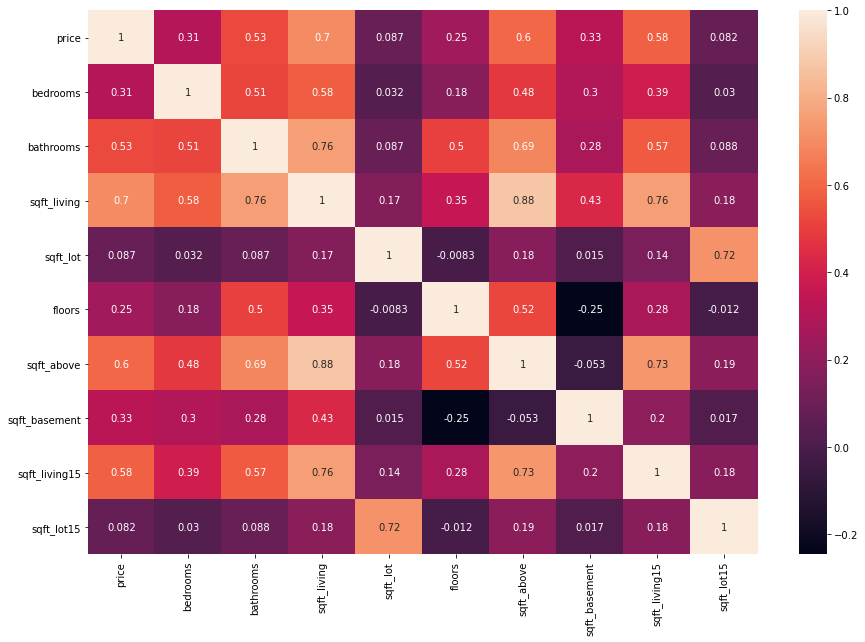

In [40]:
fig,ax = plt.subplots(figsize=(15,10))

sns.heatmap(data=df[['price',*colList]].corr(),annot=True)

In [30]:
df[[*colList]]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,6,3.00,2400,9373,2.0,2400,0.0,2060,7316
1,4,1.75,2060,26036,1.0,1160,900.0,2590,21891
2,3,1.00,1460,43000,1.0,1460,0.0,2250,20023
3,3,1.00,1430,7599,1.5,1010,420.0,1290,10320
4,4,2.00,1650,3504,1.0,760,890.0,1480,3504
...,...,...,...,...,...,...,...,...,...
20965,5,2.00,1600,4168,1.5,1600,0.0,1190,4168
20966,2,1.00,1040,7372,1.0,840,200.0,1930,5150
20967,3,1.00,1100,4128,1.0,720,380.0,1510,4538
20968,2,1.75,1410,1005,1.5,900,510.0,1440,1188


In [51]:
colModels = []
for col in colList:
    colModels.append(colModel)
    colModel.summary()

In [69]:
for model in colModels:
    display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1675.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:16:42   Log-Likelihood:            -2.2296e+05
No. Observations:               15727   AIC:                         4.459e+05
Df Residuals:                   15725   BIC:                         4.459e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.308e+05   1.04e+04     12.613      0.000    1.11e+05    1.51e+05
bedrooms    1.214e+05   2966.983     40.929      0.000    1.16e+05    1.27e+05
==============================================================================
Omnibus:                    14551.736   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1246393.496
Skew:                           4.184   Prob(JB):                         0.00
Kurtosis:                      45.802   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     6003.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:16:42   Log-Likelihood:            -2.2121e+05
No. Observations:               15727   AIC:                         4.424e+05
Df Residuals:                   15725   BIC:                         4.424e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.201e+04   7251.012      1.657      0.098   -2199.137    2.62e+04
bathrooms   2.497e+05   3223.161     77.477      0.000    2.43e+05    2.56e+05
==============================================================================
Omnibus:                    13452.046   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           925039.995
Skew:                           3.740   Prob(JB):                         0.00
Kurtosis:                      39.820   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.507e+04
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:16:42   Log-Likelihood:            -2.1847e+05
No. Observations:               15727   AIC:                         4.369e+05
Df Residuals:                   15725   BIC:                         4.370e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.931e+04   5157.089     -7.622      0.000   -4.94e+04   -2.92e+04
sqft_living   278.4995      2.268    122.770      0.000     274.053     282.946
==============================================================================
Omnibus:                    11591.708   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           554594.120
Skew:                           3.053   Prob(JB):                         0.00
Kurtosis:                      31.444   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     138.5
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           7.70e-32
Time:                        17:16:42   Log-Likelihood:            -2.2368e+05
No. Observations:               15727   AIC:                         4.474e+05
Df Residuals:                   15725   BIC:                         4.474e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.274e+05   3090.823    170.632      0.000    5.21e+05    5.33e+05
sqft_lot       0.8309      0.071     11.769      0.000       0.693       0.969
==============================================================================
Omnibus:                    14736.540   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1175993.558
Skew:                           4.305   Prob(JB):                         0.00
Kurtosis:                      44.479   Cond. No.                     4.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1083.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):          7.89e-230
Time:                        17:16:42   Log-Likelihood:            -2.2323e+05
No. Observations:               15727   AIC:                         4.465e+05
Df Residuals:                   15725   BIC:                         4.465e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.828e+05   8305.115     34.055      0.000    2.67e+05    2.99e+05
floors       1.72e+05   5226.527     32.915      0.000    1.62e+05    1.82e+05
==============================================================================
Omnibus:                    14954.733   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1297068.905
Skew:                           4.382   Prob(JB):                         0.00
Kurtosis:                      46.618   Cond. No.                         6.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     9021.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:16:42   Log-Likelihood:            -2.2019e+05
No. Observations:               15727   AIC:                         4.404e+05
Df Residuals:                   15725   BIC:                         4.404e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.281e+04   5534.500     11.349      0.000     5.2e+04    7.37e+04
sqft_above   266.9584      2.811     94.979      0.000     261.449     272.468
==============================================================================
Omnibus:                    12824.413   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           744299.124
Skew:                           3.517   Prob(JB):                         0.00
Kurtosis:                      35.960   Cond. No.                     4.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     1832.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:16:42   Log-Likelihood:            -2.2289e+05
No. Observations:               15727   AIC:                         4.458e+05
Df Residuals:                   15725   BIC:                         4.458e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.62e+05   3303.628    139.856      0.000    4.56e+05    4.69e+05
sqft_basement   266.3935      6.223     42.805      0.000     254.195     278.592
==============================================================================
Omnibus:                    13875.106   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           912401.182
Skew:                           3.958   Prob(JB):                         0.00
Kurtosis:                      39.465   Cond. No.                         636.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     8075.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:16:42   Log-Likelihood:            -2.2049e+05
No. Observations:               15727   AIC:                         4.410e+05
Df Residuals:                   15725   BIC:                         4.410e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.154e+04   7310.350    -11.155      0.000   -9.59e+04   -6.72e+04
sqft_living15   312.7371      3.480     89.863      0.000     305.916     319.559
==============================================================================
Omnibus:                    15612.113   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2007152.514
Skew:                           4.564   Prob(JB):                         0.00
Kurtosis:                      57.586   Cond. No.                     6.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     123.1
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           1.70e-28
Time:                        17:16:42   Log-Likelihood:            -2.2369e+05
No. Observations:               15727   AIC:                         4.474e+05
Df Residuals:                   15725   BIC:                         4.474e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.248e+05   3205.809    163.718      0.000    5.19e+05    5.31e+05
sqft_lot15     1.1901      0.107     11.095      0.000       0.980       1.400
==============================================================================
Omnibus:                    14728.249   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1171193.156
Skew:                           4.302   Prob(JB):                         0.00
Kurtosis:                      44.391   Cond. No.                     3.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
sinkModel = sm.OLS(y_train,sm.add_constant(x_train)).fit()
sinkModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2081.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:04:19   Log-Likelihood:            -2.1807e+05
No. Observations:               15727   AIC:                         4.362e+05
Df Residuals:                   15718   BIC:                         4.362e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.121e+04      1e+04      1.116      0.265   -8487.114    3.09e+04
bedrooms      -5.672e+04   2725.688    -20.809      0.000   -6.21e+04   -5.14e+04
bathrooms      3915.1339   4461.876      0.877      0.380   -4830.655    1.27e+04
sqft_living     189.5131      3.072     61.691      0.000     183.492     195.535
sqft_lot         -0.0439      0.070     -0.623      0.533      -0.182       0.094
floors         1.527e+04   5066.437      3.014      0.003    5338.202    2.52e+04
sqft_above       71.2887      3.095     23.033      0.000      65.222      77.355
sqft_basement   118.2244      3.661     32.293      0.000     111.049     125.400
sqft_living15    71.8729      4.695     15.309      0.000      62.671      81.075
sqft_lot15       -0.7561      0.107     -7.052      0.000      -0.966      -0.546
==============================================================================
Omnibus:                    11820.861   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           630206.878
Skew:                           3.111   Prob(JB):                         0.00
Kurtosis:                      33.381   Cond. No.                     9.76e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.14e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""